In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

Prophet decomposes time series data into trend, seasonality and holiday effect.

Trend models non periodic changes in the time series data.

Seasonality is caused due to the periodic changes like daily, weekly, or yearly seasonality.

Holiday effect which occur on irregular schedules over a day or a period of days.

Error terms is what is not explained by the model.

1. Accurate and fast - Prophet is accurate and fast. It is used in many applications across Facebook for producing reliable forecasts for planning and goal setting.
2. Fully automatic - Prophet is fully automatic. We will get a reasonable forecast on messy data with no manual effort.
3. Tunable forecasts - Prophet produces adjustable forecasts. It includes many possibilities for users to tweak and adjust forecasts. We can use human-interpretable parameters to improve the forecast by adding our domain knowledge.
4. Available in R or Python - We can implement the Prophet procedure in R or Python.
5. Handles seasonal variations well - Prophet accommodates seasonality with multiple periods.
6. Robust to outliers - It is robust to outliers. It handles outliers by removing them.
7. Robust to missing data - Prophet is resilient to missing data.

In [2]:
data = pd.read_csv("./data/data_daily_forecast.csv")

In [3]:
data.set_index("Unnamed: 0",inplace=True)

In [4]:
data.index.names = ['Date']

In [5]:
data.head()

,price,load_forecast,solar_production,wind_production,temperature_forecast,capacity_thermal_coal,border_flow,capacity_thermal_gas,capacity_nuclear,capacity_hydro,capacity_thermal_oil,oil_price,coal_price,nuclear_production,thermal_coal_production,thermal_oil_production,thermal_biomass_production,thermal_gas_production,gas_price
Date,,,,,,,,,,,,,,,,,,,
2020-08-31 00:00:00,29.76,NaN,0.0,12378.4492,14.4,15676.04,NaN,NaN,7994.0,NaN,1646.1,NaN,NaN,8107.0,0.0,400.0,4403.646,10531.198,1.487063
2020-08-31 01:00:00,27.92,NaN,0.0,11102.5674,14.0,15676.04,NaN,NaN,7994.0,NaN,1646.1,NaN,NaN,8107.0,0.0,400.0,4403.646,10557.198,1.487063
2020-08-31 02:00:00,28.89,NaN,0.0,9484.9560,13.7,15676.04,NaN,NaN,7994.0,NaN,1646.1,NaN,NaN,8107.0,0.0,400.0,4403.646,10632.198,1.487063
2020-08-31 03:00:00,28.43,NaN,0.0,8239.8850,13.4,15676.04,NaN,NaN,7994.0,NaN,1646.1,NaN,NaN,8107.0,0.0,400.0,4403.646,10647.198,1.487063
2020-08-31 04:00:00,29.41,NaN,0.0,7431.8440,13.3,15676.04,NaN,NaN,7994.0,NaN,1646.1,NaN,NaN,8107.0,0.0,400.0,4403.646,11321.698,1.487063


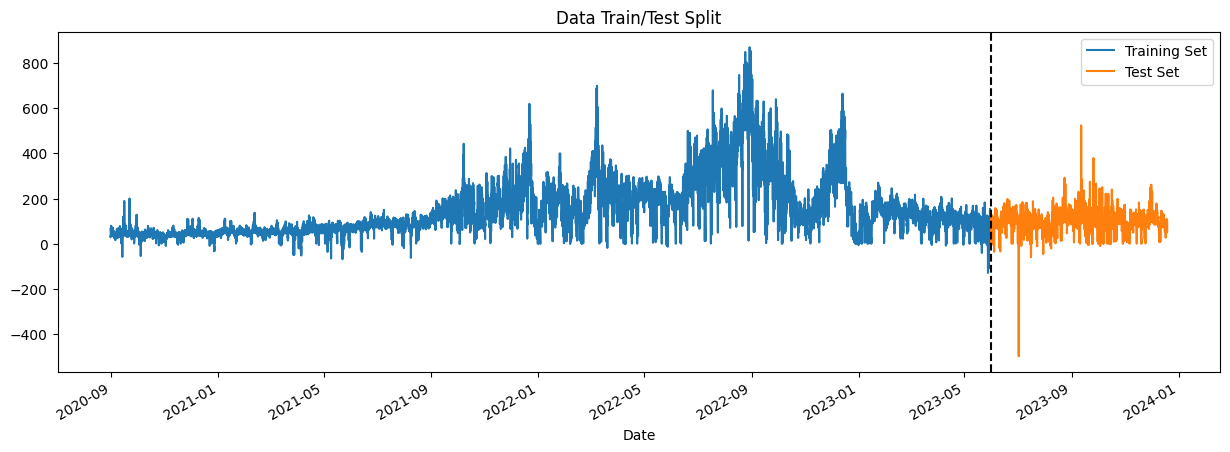

In [54]:
df = data[["price"]]

df.index = pd.to_datetime(df.index)

df.sort_index(inplace=True)

train = df.loc[df.index < "2023-06-01 00:00:00"]
test = df.loc[df.index >= '2023-06-01 00:00:00']

fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline('2023-06-01 00:00:00', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

In [50]:
train = train.reset_index() \
    .rename(columns={'Date':'ds',
                     'price':'y'})

In [51]:
train.fillna(0.0, inplace=True)

In [52]:
train.head()

,index,ds,y,gas_price,coal_price,oil_price,capacity_thermal_oil,thermal_biomass_production,solar_production,wind_production
0,0,2020-08-31 00:00:00,29.76,1.487063,0.0,0.0,1646.1,4403.646,0.0,12378.4492
1,1,2020-08-31 01:00:00,27.92,1.487063,0.0,0.0,1646.1,4403.646,0.0,11102.5674
2,2,2020-08-31 02:00:00,28.89,1.487063,0.0,0.0,1646.1,4403.646,0.0,9484.9560
3,3,2020-08-31 03:00:00,28.43,1.487063,0.0,0.0,1646.1,4403.646,0.0,8239.8850
4,4,2020-08-31 04:00:00,29.41,1.487063,0.0,0.0,1646.1,4403.646,0.0,7431.8440


In [71]:
from prophet import Prophet

In [72]:
prop = Prophet(growth='linear', interval_width = 0.95, 
                yearly_seasonality='auto',
                weekly_seasonality='auto',
                daily_seasonality='auto',
                seasonality_mode='additive'
              )

In [59]:
prop.fit(train)

16:50:46 - cmdstanpy - INFO - Chain [1] start processing
16:51:03 - cmdstanpy - INFO - Chain [1] done processing


In [60]:
test = test.reset_index() \
    .rename(columns={'Date':'ds',
                     'price':'y'})

forecast = prop.predict(test)

In [61]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-06-01 00:00:00,213.181458,-53.560264,189.627500,213.181458,213.181458,-144.438918,-144.438918,-144.438918,-13.926219,...,15.501283,15.501283,15.501283,-146.013982,-146.013982,-146.013982,0.0,0.0,0.0,68.742540
1,2023-06-01 01:00:00,213.201032,-63.753957,187.108194,213.201032,213.201032,-150.670686,-150.670686,-150.670686,-19.968710,...,15.269551,15.269551,15.269551,-145.971527,-145.971527,-145.971527,0.0,0.0,0.0,62.530346
2,2023-06-01 02:00:00,213.220607,-67.854233,186.166974,213.220607,213.220607,-158.645913,-158.645913,-158.645913,-27.733009,...,15.015480,15.015480,15.015480,-145.928384,-145.928384,-145.928384,0.0,0.0,0.0,54.574694
3,2023-06-01 03:00:00,213.240182,-78.588695,175.277138,213.240182,213.240182,-164.557803,-164.557803,-164.557803,-33.413638,...,14.740387,14.740387,14.740387,-145.884552,-145.884552,-145.884552,0.0,0.0,0.0,48.682378
4,2023-06-01 04:00:00,213.259756,-65.261048,166.893311,213.259756,213.259756,-161.796621,-161.796621,-161.796621,-30.402496,...,14.445909,14.445909,14.445909,-145.840035,-145.840035,-145.840035,0.0,0.0,0.0,51.463135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4819,2023-12-18 19:00:00,307.511624,-672.813404,1671.169880,-840.515464,1528.353896,167.196910,167.196910,167.196910,44.147389,...,16.361054,16.361054,16.361054,106.688467,106.688467,106.688467,0.0,0.0,0.0,474.708534
4820,2023-12-18 20:00:00,307.531198,-710.058336,1708.591128,-840.842377,1528.905632,160.664380,160.664380,160.664380,37.173284,...,17.210502,17.210502,17.210502,106.280594,106.280594,106.280594,0.0,0.0,0.0,468.195578
4821,2023-12-18 21:00:00,307.550773,-703.747795,1667.488978,-841.169290,1529.457368,144.541409,144.541409,144.541409,20.716087,...,17.953746,17.953746,17.953746,105.871576,105.871576,105.871576,0.0,0.0,0.0,452.092182
4822,2023-12-18 22:00:00,307.570348,-780.365337,1651.157717,-841.496203,1530.009104,127.853214,127.853214,127.853214,3.798515,...,18.593277,18.593277,18.593277,105.461423,105.461423,105.461423,0.0,0.0,0.0,435.423562


c:\Users\Chaitanya Ashtekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\Chaitanya Ashtekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


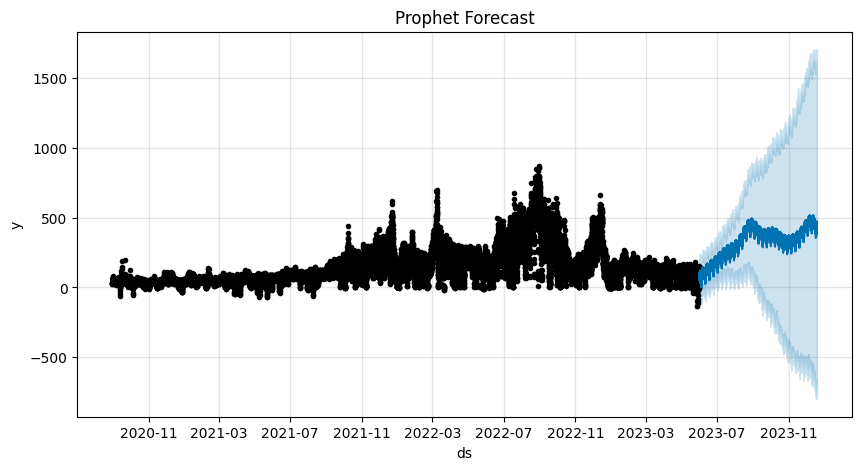

In [62]:
fig, ax = plt.subplots(figsize=(10, 5))
fig = prop.plot(forecast, ax=ax)
ax.set_title('Prophet Forecast')
plt.show()

c:\Users\Chaitanya Ashtekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\Chaitanya Ashtekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
c:\Users\Chaitanya Ashtekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a 

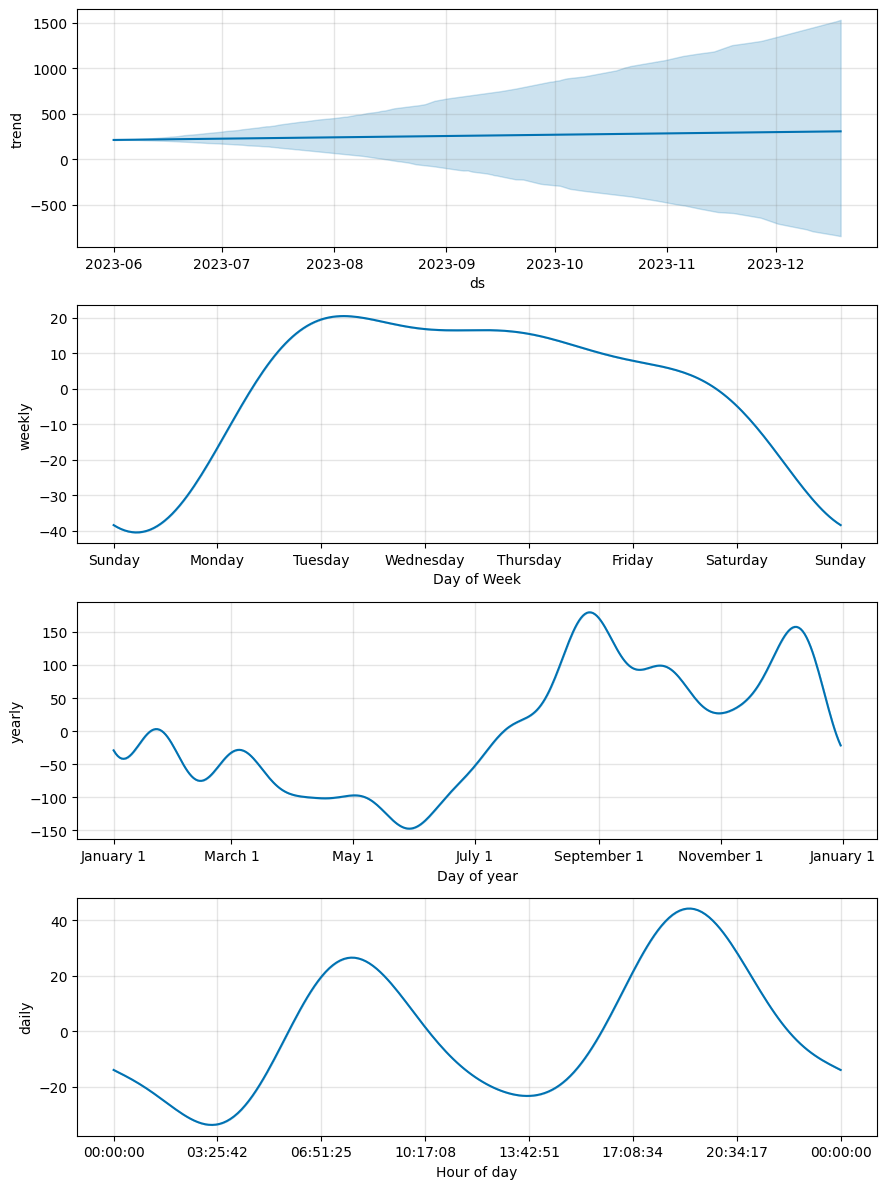

In [63]:
fig = prop.plot_components(forecast)
plt.show()

In [64]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_true=test['y'],
                   y_pred=forecast['yhat'])

221.39656533469466

In [67]:
test.index = test["ds"]

c:\Users\Chaitanya Ashtekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\Chaitanya Ashtekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


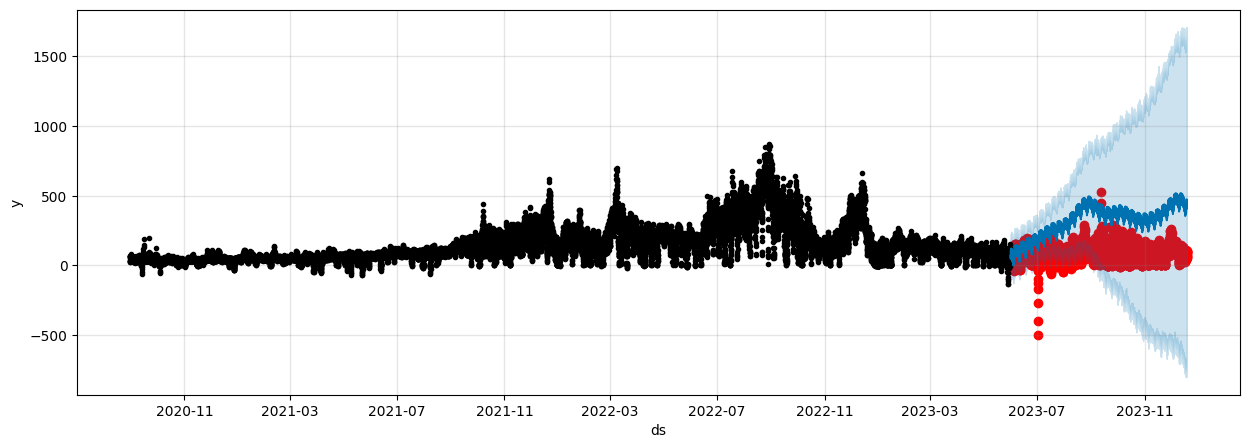

In [69]:
f, ax = plt.subplots(figsize=(15, 5))
ax.scatter(test.index, test['y'], color='r')
fig = prop.plot(forecast, ax=ax)

In [77]:
from prophet import Prophet

prop = Prophet(changepoint_prior_scale=0.1)

In [6]:
def season_calc(month):
    """adding season based on the data 
       months from June to October are denoted as 'summer' and months from November to May as 'winter'. """
    if month in [6,7,8,9,10]:
        return 0
    else:
        return 1

In [7]:
df = data[["price", "gas_price", "coal_price", "oil_price", "capacity_thermal_oil",
   "thermal_biomass_production", "solar_production", "wind_production"]]

df.index = pd.to_datetime(df.index)

df.sort_index(inplace=True)

df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
df['hour'] = df.index.hour
df['weekday'] = df.index.weekday
df['season'] = df.month.apply(season_calc)



C:\Users\Chaitanya Ashtekar\AppData\Local\Temp\ipykernel_21012\91458765.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df.index.year
C:\Users\Chaitanya Ashtekar\AppData\Local\Temp\ipykernel_21012\91458765.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
C:\Users\Chaitanya Ashtekar\AppData\Local\Temp\ipykernel_21012\91458765.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

In [80]:
train = df.loc[df.index < "2023-06-01 00:00:00"]
test = df.loc[df.index >= '2023-06-01 00:00:00']

In [81]:
prop.add_regressor('gas_price', mode='additive', standardize=True)
prop.add_regressor('coal_price', mode='additive', standardize=True)
prop.add_regressor('oil_price', mode='additive', standardize=True)
prop.add_regressor('capacity_thermal_oil', mode='additive', standardize=True)
prop.add_regressor('thermal_biomass_production', mode='additive', standardize=True)
prop.add_regressor('solar_production', mode='additive', standardize=True)
prop.add_regressor('wind_production', mode='additive', standardize=True)
prop.add_regressor("season", mode='additive')
prop.add_regressor("weekday", mode="additive")
prop.add_regressor("hour", mode='additive')

In [82]:
train = train.reset_index() \
    .rename(columns={'Date':'ds',
                     'price':'y'})

In [83]:
train.fillna(0.0, inplace=True)

In [84]:
prop.fit(train)

12:02:56 - cmdstanpy - INFO - Chain [1] start processing
12:04:11 - cmdstanpy - INFO - Chain [1] done processing


In [85]:
test = test.reset_index() \
    .rename(columns={'Date':'ds',
                     'price':'y'})

forecast = prop.predict(test)

c:\Users\Chaitanya Ashtekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\Chaitanya Ashtekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


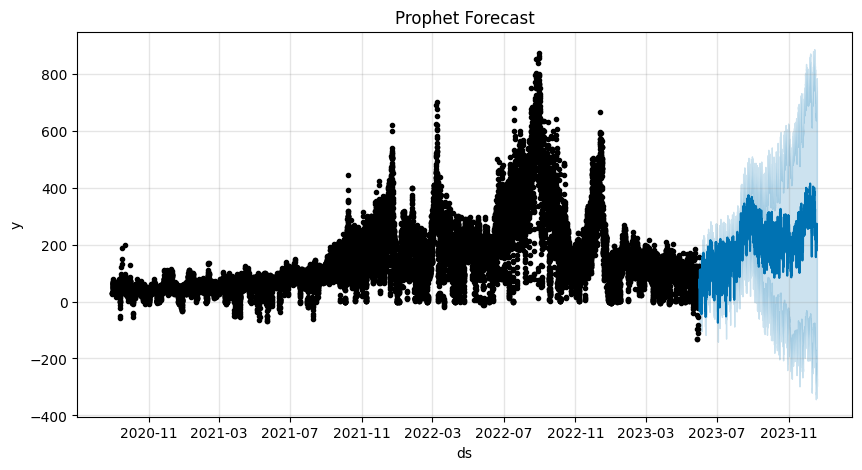

In [86]:
fig, ax = plt.subplots(figsize=(10, 5))
fig = prop.plot(forecast, ax=ax)
ax.set_title('Prophet Forecast')
plt.show()

In [87]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_true=test['y'],
                   y_pred=forecast['yhat'])

107.59864009395181

In [88]:
test.index = test["ds"]

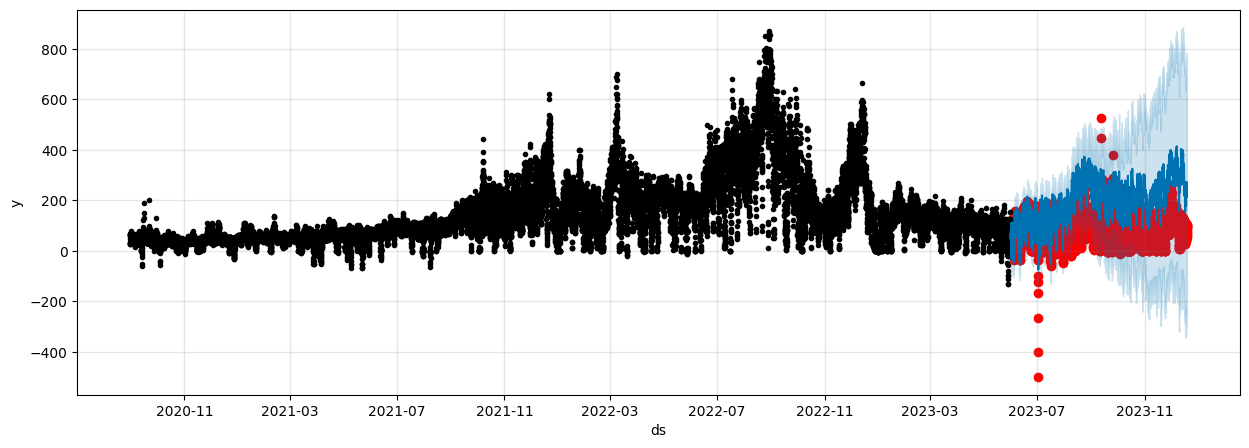

In [90]:
f, ax = plt.subplots(figsize=(15, 5))
ax.scatter(test.index, test['y'], color='r')
fig = prop.plot(forecast, ax=ax)

In [8]:
df__ = df.reset_index().rename(columns={'Date':'ds',"price": "y"})

In [94]:
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
import itertools
import numpy as np
import pandas as pd

param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
}

cutoffs = pd.to_datetime(['2021-09-01', '2022-06-01', '2023-06-01'])

all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []
mses = [] 
maes = []

for params in all_params:
    m = Prophet(**params).fit(df__)
    df_cv = cross_validation(m, initial="26280 hours", period="24 hours", horizon='24 hours')
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])
    mses.append(df_p["mse"].values[0])
    maes.append(df_p["mae"].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
tuning_results["mse"] = mses
tuning_results["mae"] = maes
print(tuning_results)

18:13:47 - cmdstanpy - INFO - Chain [1] start processing
18:13:52 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/204 [00:00<?, ?it/s]18:13:57 - cmdstanpy - INFO - Chain [1] start processing
18:14:01 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 1/204 [00:05<18:26,  5.45s/it]18:14:03 - cmdstanpy - INFO - Chain [1] start processing
18:14:07 - cmdstanpy - INFO - Chain [1] done processing
  1%|          | 2/204 [00:11<20:05,  5.97s/it]18:14:09 - cmdstanpy - INFO - Chain [1] start processing
18:14:13 - cmdstanpy - INFO - Chain [1] done processing
  1%|▏         | 3/204 [00:17<19:06,  5.71s/it]18:14:15 - cmdstanpy - INFO - Chain [1] start processing
18:14:18 - cmdstanpy - INFO - Chain [1] done processing
  2%|▏         | 4/204 [00:22<18:53,  5.67s/it]18:14:20 - cmdstanpy - INFO - Chain [1] start processing
18:14:25 - cmdstanpy - INFO - Chain [1] done processing
  2%|▏         | 5/204 [00:29<19:52,  5.99s/it]18:14:27 - cmdstanpy - INFO - Chain [1] start pr

KeyboardInterrupt: 

In [102]:
best_params = all_params[np.argmin(rmses)]
print(best_params)

{'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.1}


In [9]:
from prophet import Prophet

prop = Prophet(changepoint_prior_scale=0.001, seasonality_prior_scale=0.1)

c:\Users\Chaitanya Ashtekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
df = data[["price", "gas_price", "coal_price", "oil_price", "capacity_thermal_oil",
   "thermal_biomass_production", "solar_production", "wind_production"]]

df.index = pd.to_datetime(df.index)

df.sort_index(inplace=True)

df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
df['hour'] = df.index.hour
df['weekday'] = df.index.weekday
df['season'] = df.month.apply(season_calc)

C:\Users\Chaitanya Ashtekar\AppData\Local\Temp\ipykernel_16864\918578997.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df.index.year
C:\Users\Chaitanya Ashtekar\AppData\Local\Temp\ipykernel_16864\918578997.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
C:\Users\Chaitanya Ashtekar\AppData\Local\Temp\ipykernel_16864\918578997.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

In [115]:
train = df.loc[df.index < "2023-06-01 00:00:00"]
test = df.loc[df.index >= '2023-06-01 00:00:00']

In [118]:
prop.add_regressor('gas_price', mode='additive', standardize=True)
prop.add_regressor('coal_price', mode='additive', standardize=True)
prop.add_regressor('oil_price', mode='additive', standardize=True)
prop.add_regressor('capacity_thermal_oil', mode='additive', standardize=True)
prop.add_regressor('thermal_biomass_production', mode='additive', standardize=True)
prop.add_regressor('solar_production', mode='additive', standardize=True)
prop.add_regressor('wind_production', mode='additive', standardize=True)
prop.add_regressor("season", mode='additive')
prop.add_regressor("weekday", mode="additive")
prop.add_regressor("hour", mode='additive')

In [119]:
train = train.reset_index() \
    .rename(columns={'Date':'ds',
                     'price':'y'})

In [120]:
train.fillna(0.0, inplace=True)

In [121]:
prop.fit(train)

15:53:24 - cmdstanpy - INFO - Chain [1] start processing
15:53:27 - cmdstanpy - INFO - Chain [1] done processing


In [123]:
test = test.reset_index() \
    .rename(columns={'Date':'ds',
                     'price':'y'})

forecast = prop.predict(test)

In [124]:
test.index = test["ds"]

c:\Users\Chaitanya Ashtekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\Chaitanya Ashtekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


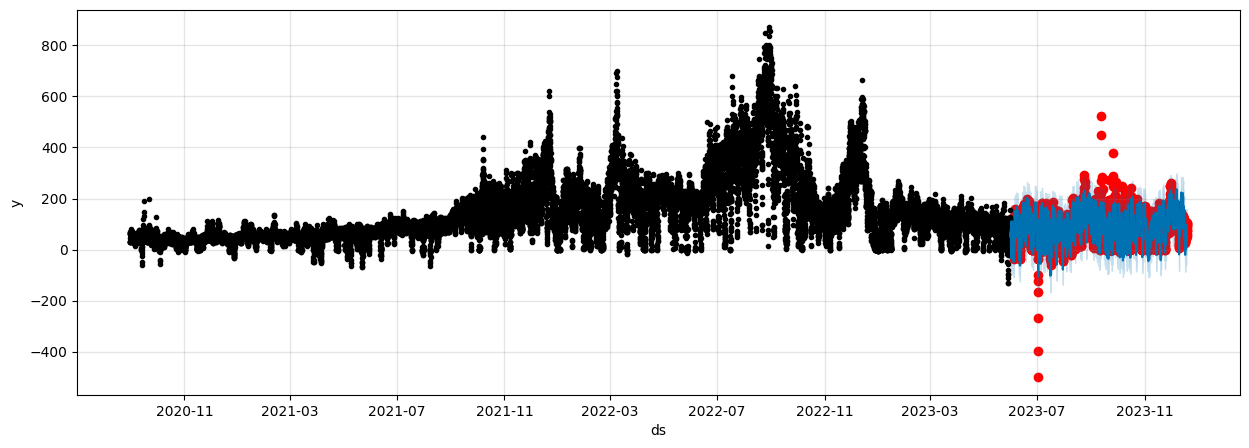

In [125]:
f, ax = plt.subplots(figsize=(15, 5))
ax.scatter(test.index, test['y'], color='r')
fig = prop.plot(forecast, ax=ax)

In [126]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_true=test['y'],
                   y_pred=forecast['yhat'])

24.98969467071581

In [127]:
train_forecast = prop.predict(train)

In [128]:
train.index = train["ds"]

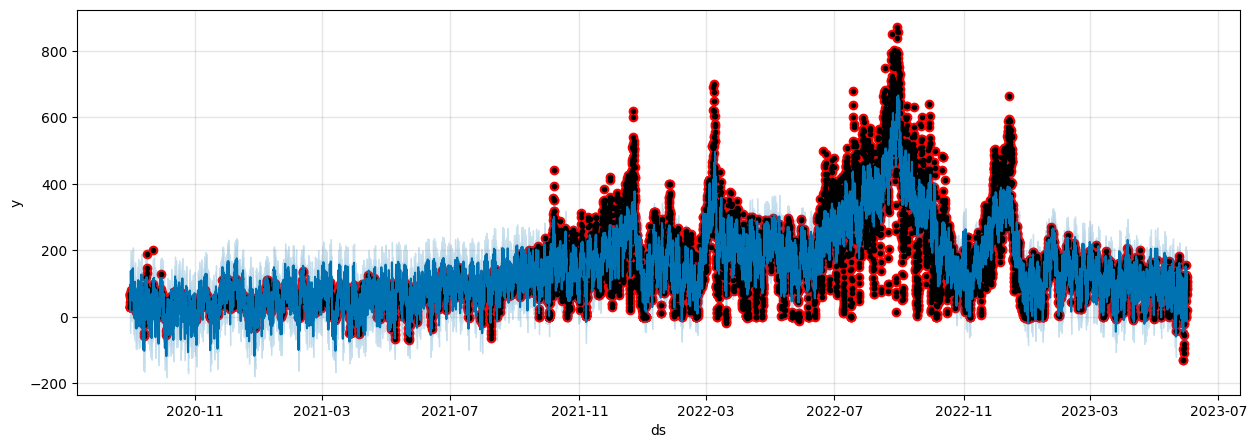

In [132]:
f, ax = plt.subplots(figsize=(15, 5))
ax.scatter(train.index, train['y'], color='r')
fig = prop.plot(train_forecast, ax=ax)

In [133]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_true=train['y'],
                   y_pred=train_forecast['yhat'])

33.91997240669333

In [214]:
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet import Prophet

prop = Prophet(changepoint_prior_scale=0.001, seasonality_prior_scale=0.1)

prop.add_regressor('gas_price', mode='additive', standardize=True)
prop.add_regressor('coal_price', mode='additive', standardize=True)
prop.add_regressor('oil_price', mode='additive', standardize=True)
prop.add_regressor('capacity_thermal_oil', mode='additive', standardize=True)
prop.add_regressor('thermal_biomass_production', mode='additive', standardize=True)
prop.add_regressor('solar_production', mode='additive', standardize=True)
prop.add_regressor('wind_production', mode='additive', standardize=True)
prop.add_regressor("season", mode='additive')
prop.add_regressor("weekday", mode="additive")
prop.add_regressor("hour", mode='additive')

df_ = df.reset_index().rename(columns={'Date':'ds',"price": "y"})

df_.fillna(0.0, inplace=True)

m = prop.fit(df_)

cv_results = cross_validation(m, initial="24096 hours", period="24 hours", horizon="24 hours")

15:26:41 - cmdstanpy - INFO - Chain [1] start processing
15:26:44 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/200 [00:00<?, ?it/s]15:26:51 - cmdstanpy - INFO - Chain [1] start processing
15:26:57 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 1/200 [00:08<28:44,  8.67s/it]15:26:59 - cmdstanpy - INFO - Chain [1] start processing
15:27:05 - cmdstanpy - INFO - Chain [1] done processing
  1%|          | 2/200 [00:16<27:26,  8.31s/it]15:27:07 - cmdstanpy - INFO - Chain [1] start processing
15:27:09 - cmdstanpy - INFO - Chain [1] done processing
  2%|▏         | 3/200 [00:21<21:26,  6.53s/it]15:27:12 - cmdstanpy - INFO - Chain [1] start processing
15:27:15 - cmdstanpy - INFO - Chain [1] done processing
  2%|▏         | 4/200 [00:26<20:21,  6.23s/it]15:27:17 - cmdstanpy - INFO - Chain [1] start processing
15:27:20 - cmdstanpy - INFO - Chain [1] done processing
  2%|▎         | 5/200 [00:31<18:26,  5.67s/it]15:27:22 - cmdstanpy - INFO - Chain [1] start pr

Metrics are calculated over a rolling window of cross validation predictions, after sorting by horizon. Averaging is first done within each value of the horizon, and then across horizons as needed to reach the window size. The size of that window (number of simulated forecast points) is determined by the rolling_window argument, which specifies a proportion of simulated forecast points to include in each window. rolling_window=0 will compute it separately for each horizon. The default of rolling_window=0.1 will use 10 rolling_window=1 will compute the metric across all simulated forecast points. The results are set to the right edge of the window.

In [215]:
df_p = performance_metrics(cv_results, rolling_window=0)

In [216]:
cv_results.to_excel("price_prediction_6.xlsx")

In [217]:
df_p.to_excel("price_prediction_performance_6.0.xlsx")

c:\Users\Chaitanya Ashtekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:546: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
c:\Users\Chaitanya Ashtekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


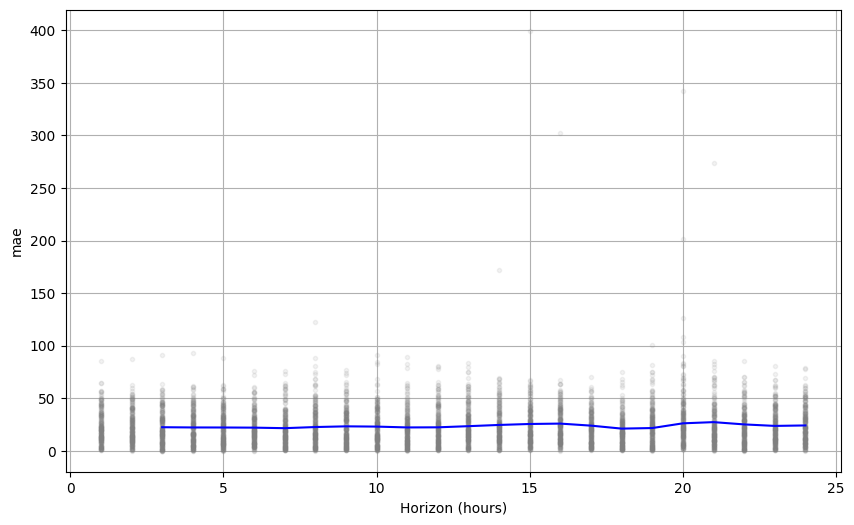

In [218]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(cv_results, metric='mae')

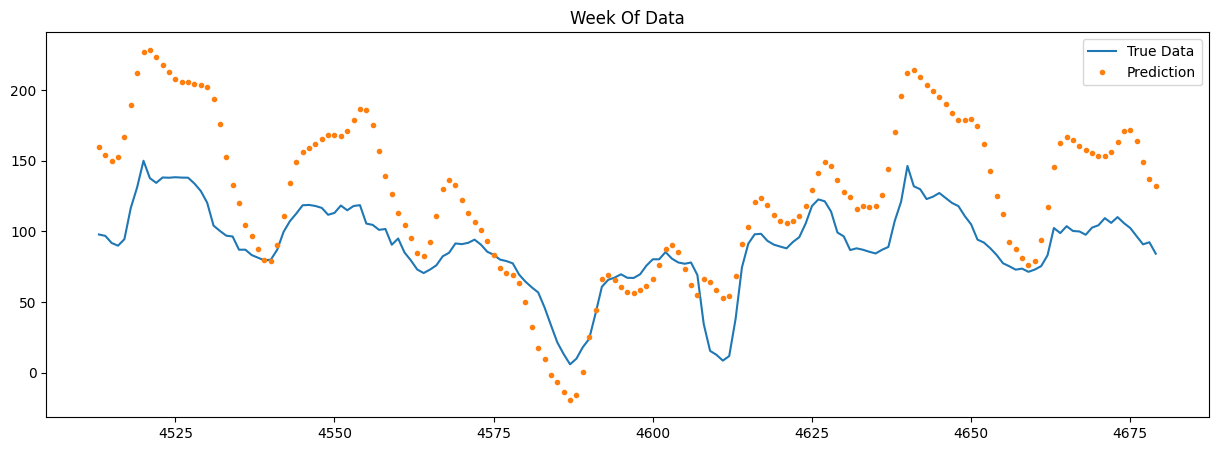

In [219]:
ax = cv_results.loc[(cv_results.ds > '12-07-2023') & (cv_results.ds < '12-14-2023')]['y'] \
    .plot(figsize=(15, 5), title='Week Of Data')
cv_results.loc[(cv_results.ds > '12-07-2023') & (cv_results.ds < '12-14-2023')]['yhat'] \
    .plot(style='.')
plt.legend(['True Data','Prediction'])
plt.show()

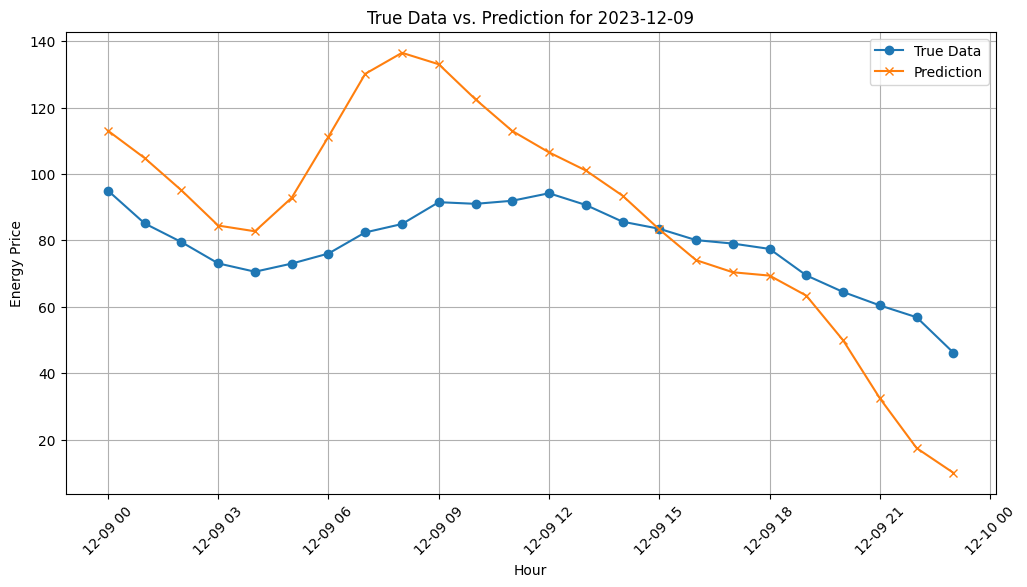

In [220]:
desired_day = '2023-12-09'

day_data = cv_results[cv_results['ds'].dt.date == pd.to_datetime(desired_day).date()]

plt.figure(figsize=(12, 6))
plt.plot(day_data['ds'], day_data['y'], label='True Data', marker='o')
plt.plot(day_data['ds'], day_data['yhat'], label='Prediction', marker='x')
plt.xlabel('Hour')
plt.ylabel('Energy Price')
plt.title(f'True Data vs. Prediction for {desired_day}')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [82]:
future = prop.make_future_dataframe(freq="H", periods=24*7, include_history=False)

c:\Users\Chaitanya Ashtekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


In [83]:
future

,ds
0,2023-12-19 00:00:00
1,2023-12-19 01:00:00
2,2023-12-19 02:00:00
3,2023-12-19 03:00:00
4,2023-12-19 04:00:00
...,...
163,2023-12-25 19:00:00
164,2023-12-25 20:00:00
165,2023-12-25 21:00:00
166,2023-12-25 22:00:00


### Another Approach: Combine the trend obtained from Prophet with XGBoost.

In [71]:
def prophet_features(df, horizon=24):
    temp_df = df.reset_index()
    temp_df = temp_df[['Date', 'price']]
    temp_df.rename(columns={'Date': 'ds', 'price': 'y'}, inplace=True)
    
    train, test = temp_df.iloc[:-horizon,:], temp_df.iloc[-horizon:,:]
    
    #define prophet model
    m = Prophet(
                growth='linear',
                changepoint_prior_scale= 0.001, 
                seasonality_prior_scale= 0.1,
                seasonality_mode='additive',
                interval_width=0.95,
                daily_seasonality=True,
                weekly_seasonality=True,
                yearly_seasonality=False
            )
    #train prophet model
    m.fit(train)
    
    #extract features from data using prophet to predict train set
    predictions_train = m.predict(train.drop('y', axis=1))
    #extract features from data using prophet to predict test set
    predictions_test = m.predict(test.drop('y', axis=1))
    #merge train and test predictions
    predictions = pd.concat([predictions_train, predictions_test], axis=0)

    return predictions

In [73]:
prophet_features(df)

17:52:33 - cmdstanpy - INFO - Chain [1] start processing
17:52:38 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-08-31 00:00:00,5.231226,-182.490551,145.037723,5.231226,5.231226,-28.361059,-28.361059,-28.361059,-12.520403,-12.520403,-12.520403,-15.840656,-15.840656,-15.840656,0.0,0.0,0.0,-23.129833
1,2020-08-31 01:00:00,5.243454,-189.386185,135.538491,5.243454,5.243454,-32.018123,-32.018123,-32.018123,-18.265149,-18.265149,-18.265149,-13.752975,-13.752975,-13.752975,0.0,0.0,0.0,-26.774670
2,2020-08-31 02:00:00,5.255681,-190.188321,128.277386,5.255681,5.255681,-37.383477,-37.383477,-37.383477,-25.728879,-25.728879,-25.728879,-11.654598,-11.654598,-11.654598,0.0,0.0,0.0,-32.127796
3,2020-08-31 03:00:00,5.267909,-183.466988,118.111953,5.267909,5.267909,-40.847531,-40.847531,-40.847531,-31.289941,-31.289941,-31.289941,-9.557590,-9.557590,-9.557590,0.0,0.0,0.0,-35.579622
4,2020-08-31 04:00:00,5.280136,-196.239395,123.107805,5.280136,5.280136,-35.974463,-35.974463,-35.974463,-28.500676,-28.500676,-28.500676,-7.473787,-7.473787,-7.473787,0.0,0.0,0.0,-30.694326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,2023-12-18 19:00:00,52.923461,-45.878996,274.826057,52.923461,52.923461,59.733008,59.733008,59.733008,43.858601,43.858601,43.858601,15.874406,15.874406,15.874406,0.0,0.0,0.0,112.656469
20,2023-12-18 20:00:00,52.910013,-51.107112,268.938170,52.910013,52.910013,54.122601,54.122601,54.122601,37.476544,37.476544,37.476544,16.646057,16.646057,16.646057,0.0,0.0,0.0,107.032614
21,2023-12-18 21:00:00,52.896565,-67.480116,247.625288,52.896565,52.896565,38.790380,38.790380,38.790380,21.479331,21.479331,21.479331,17.311049,17.311049,17.311049,0.0,0.0,0.0,91.686945
22,2023-12-18 22:00:00,52.883117,-87.324306,224.414609,52.883117,52.883117,22.703082,22.703082,22.703082,4.831042,4.831042,4.831042,17.872040,17.872040,17.872040,0.0,0.0,0.0,75.586198


In [92]:
subset_df = df[["gas_price", "price", "coal_price", "oil_price", "capacity_thermal_oil",
"thermal_biomass_production", "solar_production", "wind_production", "hour", "weekday", "season"]]

In [ ]:
subset_df = df[["gas_price", "price", "coal_price", "oil_price", "capacity_thermal_oil",
"thermal_biomass_production", "solar_production", "wind_production", "hour", "weekday", "season"]]

In [136]:
from sklearn.model_selection import TimeSeriesSplit

tss = TimeSeriesSplit(n_splits = 30, test_size=24)

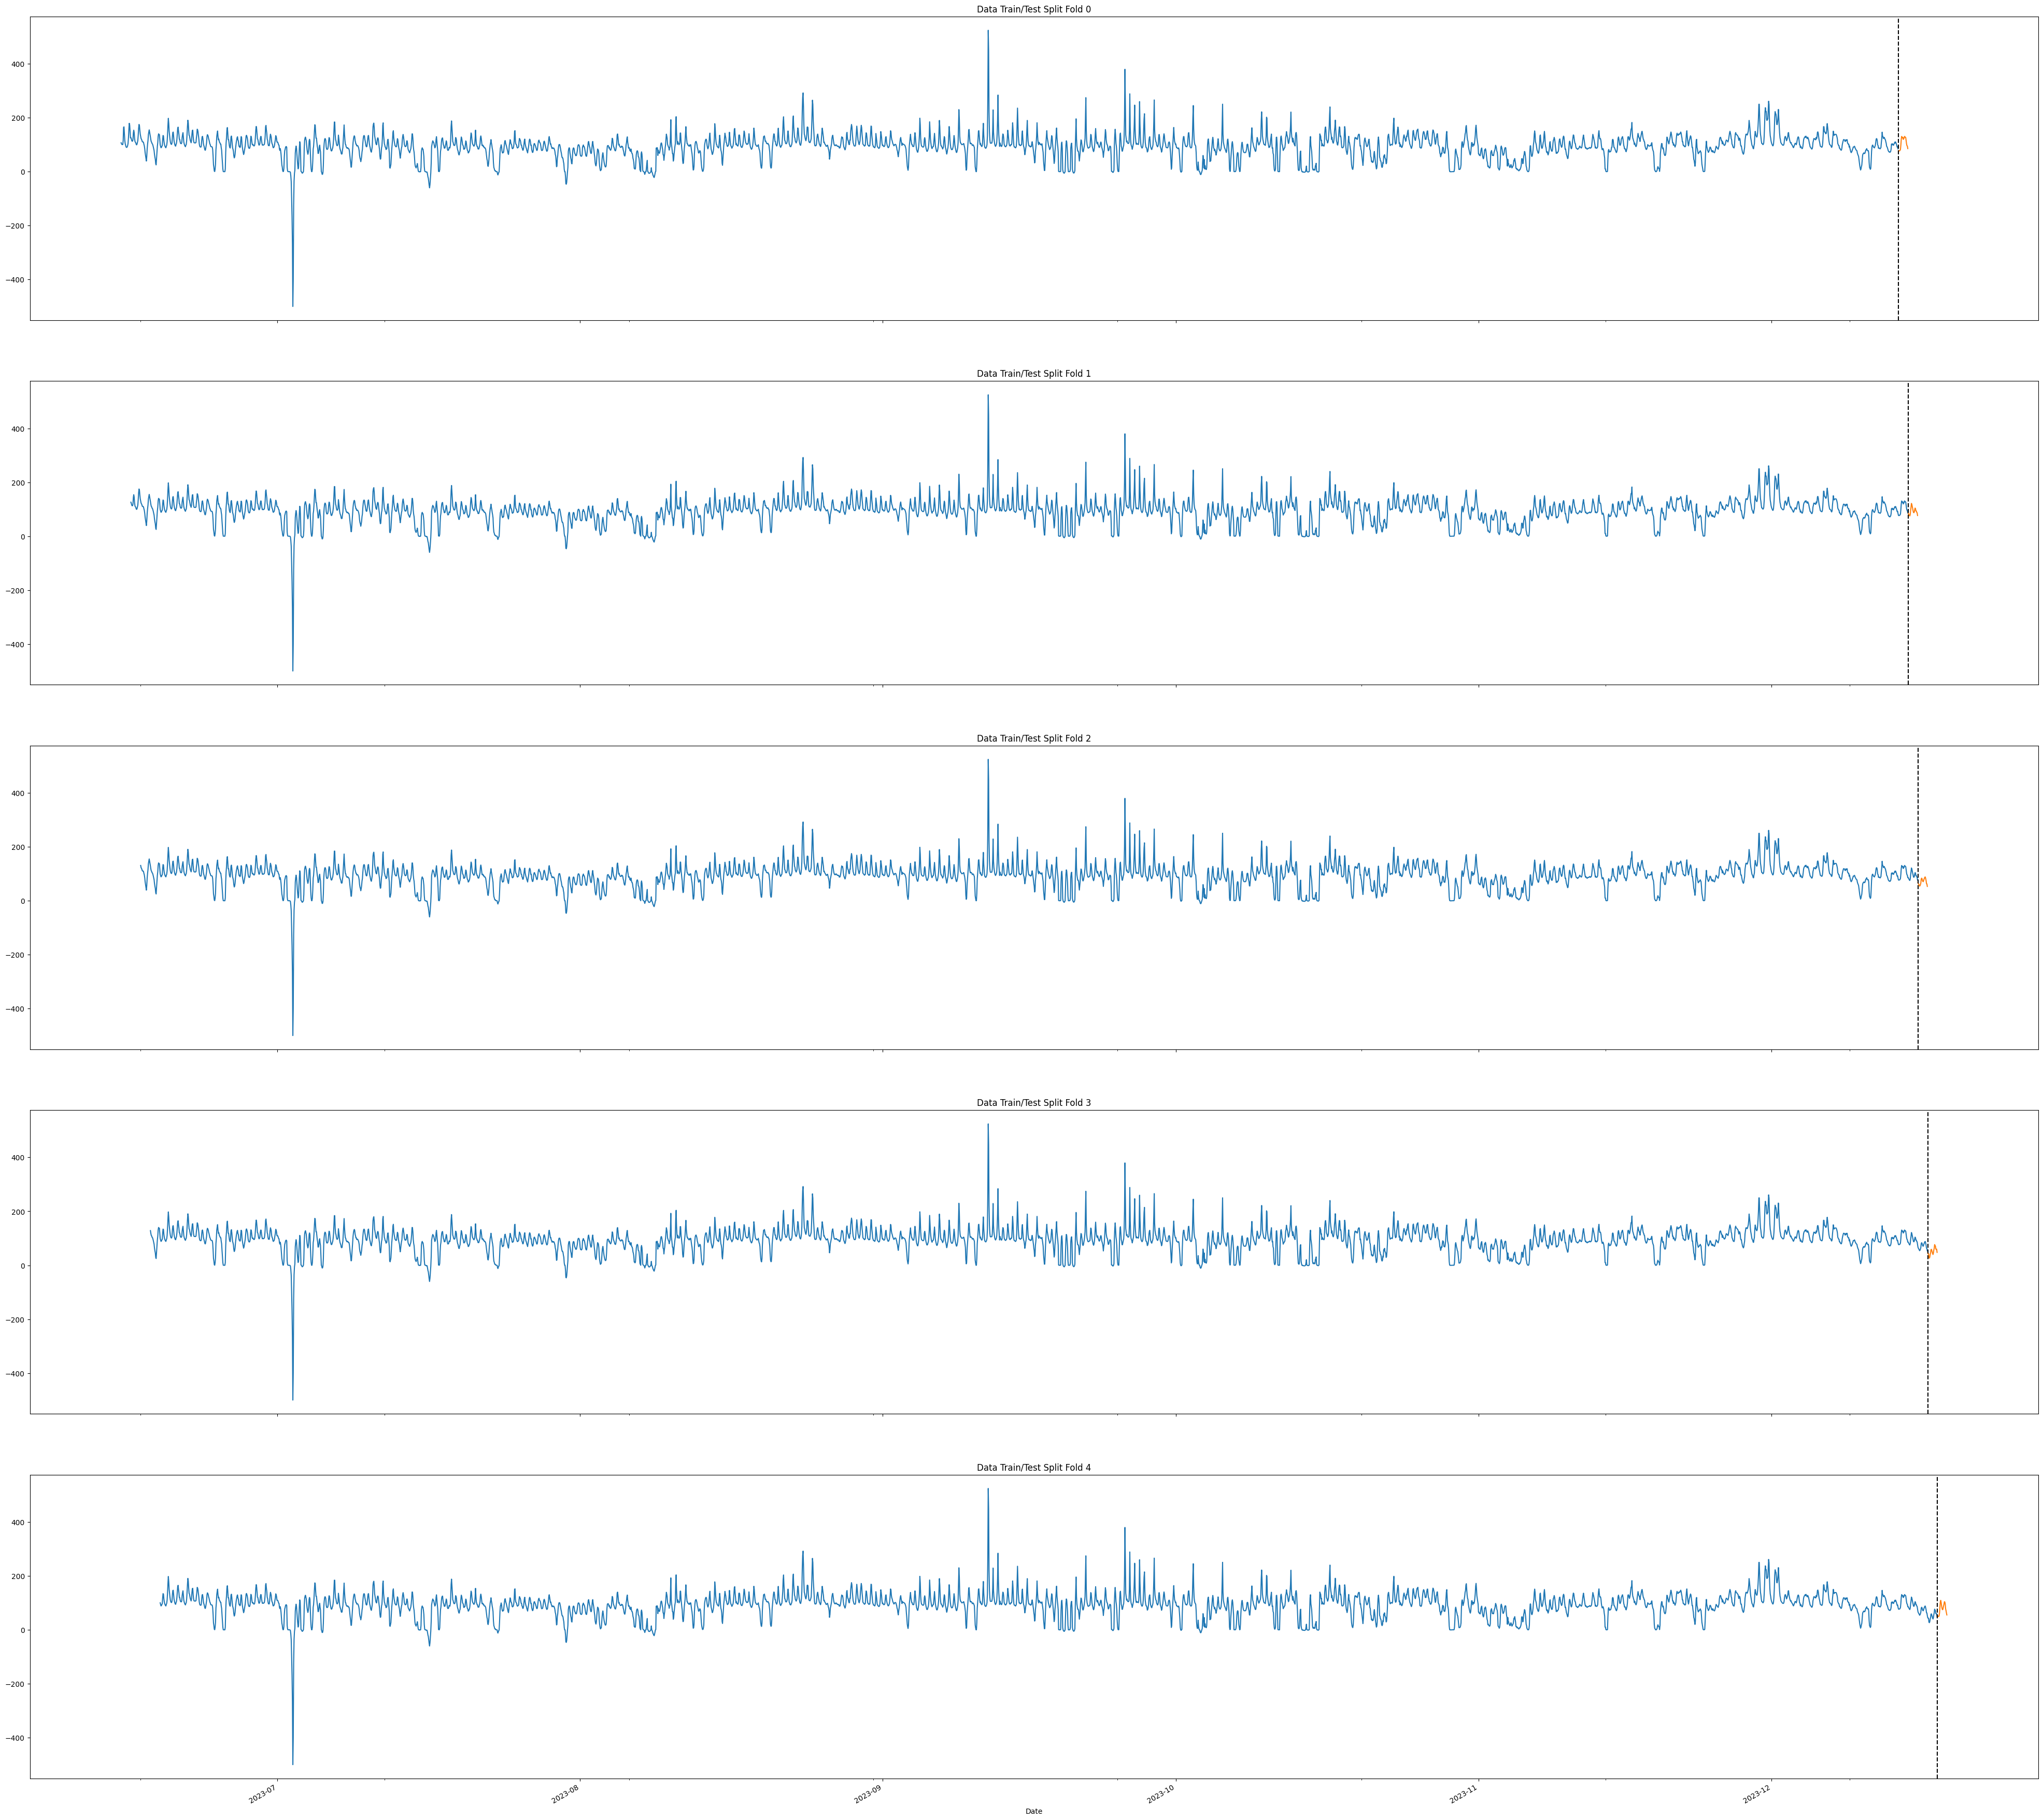

In [129]:
fig, axs = plt.subplots(5, 1, figsize=(50, 50), sharex=True)

fold = 0
for train_idx, val_idx in tss.split(df):
    train = df.iloc[train_idx]
    test = df.iloc[val_idx]
    train['price'].plot(ax=axs[fold],
                          label='Training Set',
                          title=f'Data Train/Test Split Fold {fold}')
    test['price'].plot(ax=axs[fold],
                         label='Test Set')
    axs[fold].axvline(test.index.min(), color='black', ls='--')
    fold += 1
plt.show()

In [294]:
df_ = df.copy()
# new_prophet_features = prophet_features(df_, horizon=24)
# df_.reset_index(inplace=True)

# df_ = pd.merge(df_, new_prophet_features, left_on=['Date'], right_on=['ds'], how='inner')
# df_.drop('ds', axis=1, inplace=True)
# df_.set_index('Date', inplace=True)

lags = [24,48,72, 96, 120]

for lag in lags:
    df_[f'y_lag_{lag}'] = df_['price'].shift(lag)

In [296]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor

fold = 0
preds = []
mse_scores, mae_scores, rmse_scores = [], [], []

for train_idx, val_idx in tss.split(df_):

    train = df_.iloc[train_idx]
    test = df_.iloc[val_idx]

    # train.dropna(inplace=True)
    # test.dropna(inplace=True)

    # Prophet features for train
    prop = Prophet(
                growth='linear',
                changepoint_prior_scale= 0.001, 
                seasonality_prior_scale= 0.1,
                seasonality_mode='additive',
                interval_width=0.95,
                daily_seasonality=True,
                weekly_seasonality=True,
                yearly_seasonality=False
            )
    
    train_df = train.reset_index()
    train_df = train_df[['Date', 'price']]
    train_df.rename(columns={'Date': 'ds', 'price': 'y'}, inplace=True)

    prop.fit(train_df)

    train_prop_preds = prop.predict(train_df)

    train_prop_preds.set_index("ds", inplace=True)

    FEATURES = ["gas_price", "coal_price", "oil_price", "capacity_thermal_oil",
   "thermal_biomass_production", "solar_production", "wind_production", "y_lag_24", "y_lag_48", "y_lag_72", "y_lag_96", "y_lag_120", "hour", "weekday", "season"]
    
    TARGET = "price"

    X_train = train[FEATURES]
    y_resid = train["price"] - train_prop_preds["yhat"]

    X_test = test[FEATURES]
    y_test = test["price"]

    reg = XGBRegressor(subsample= 0.7, n_estimators= 100, max_depth= 6, learning_rate= 0.2, random_state=42)
    reg.fit(X_train, y_resid)

    test_df = test.reset_index()
    test_df = test_df[['Date']]
    test_df.rename(columns={'Date': 'ds'}, inplace=True)

    test_prop_preds = prop.predict(test_df)

    y_pred = reg.predict(X_test) + test_prop_preds["yhat"]
    preds.append(y_pred)
    mse_score = mean_squared_error(y_test, y_pred)
    rmse_score = np.sqrt(mse_score)
    mae_score = mean_absolute_error(y_test, y_pred)

    mse_scores.append(mse_score)
    mae_scores.append(mae_score)
    rmse_scores.append(rmse_score)

10:26:59 - cmdstanpy - INFO - Chain [1] start processing
10:27:03 - cmdstanpy - INFO - Chain [1] done processing
10:27:09 - cmdstanpy - INFO - Chain [1] start processing
10:27:14 - cmdstanpy - INFO - Chain [1] done processing
10:27:20 - cmdstanpy - INFO - Chain [1] start processing
10:27:26 - cmdstanpy - INFO - Chain [1] done processing
10:27:32 - cmdstanpy - INFO - Chain [1] start processing
10:27:35 - cmdstanpy - INFO - Chain [1] done processing
10:27:42 - cmdstanpy - INFO - Chain [1] start processing
10:27:45 - cmdstanpy - INFO - Chain [1] done processing
10:27:51 - cmdstanpy - INFO - Chain [1] start processing
10:27:55 - cmdstanpy - INFO - Chain [1] done processing
10:28:01 - cmdstanpy - INFO - Chain [1] start processing
10:28:08 - cmdstanpy - INFO - Chain [1] done processing
10:28:14 - cmdstanpy - INFO - Chain [1] start processing
10:28:18 - cmdstanpy - INFO - Chain [1] done processing
10:28:24 - cmdstanpy - INFO - Chain [1] start processing
10:28:29 - cmdstanpy - INFO - Chain [1]

In [297]:
print(f'Score across folds {np.mean(mae_scores):0.4f}')
print(f'Fold scores:{mae_scores}')

Score across folds 20.9460
Fold scores:[18.667390869534255, 14.877726705231359, 18.922399768413143, 10.494242070033604, 45.7278023268701, 32.231836110287645, 27.148551158863143, 29.237426027938614, 10.820426549828113, 15.257341629906717, 41.551452085384255, 56.3097943874281, 29.12181442573468, 10.60653209980557, 17.304489228868373, 14.703645341488278, 8.39585677416871, 34.60213874537207, 10.517644972837118, 20.77833949425921, 28.956673340359757, 21.478459627040696, 12.137331711202753, 11.836707224638054, 10.657938812082076, 10.553994537936132, 18.408390017274538, 16.556775557775953, 13.2527974583532, 17.264655544590905]


In [286]:
data = df_.loc[(df_.index > '11-23-2023') & (df_.index < '12-30-2023')]

In [287]:
FEATURES = ["gas_price", "coal_price", "oil_price", "capacity_thermal_oil",
   "thermal_biomass_production", "solar_production", "wind_production", "y_lag_24", "y_lag_48", "y_lag_72", "hour", "weekday", "season"]

test_sample = data[FEATURES]

In [288]:
test_samp = data[["price"]]

In [289]:
# prop = Prophet(
#                 growth='linear',
#                 changepoint_prior_scale= 0.001, 
#                 seasonality_prior_scale= 0.1,
#                 seasonality_mode='additive',
#                 interval_width=0.95,
#                 daily_seasonality=True,
#                 weekly_seasonality=True,
#                 yearly_seasonality=False
#             )

temp_df = test_samp.reset_index()
temp_df = temp_df[['Date']]
temp_df.rename(columns={'Date': 'ds'}, inplace=True)

data = prop.predict(temp_df)

In [290]:
df_temp = pd.DataFrame()

In [291]:
df_temp["predictions"] = reg.predict(test_sample) + data["yhat"]

In [292]:
df_temp.index = test_sample.index

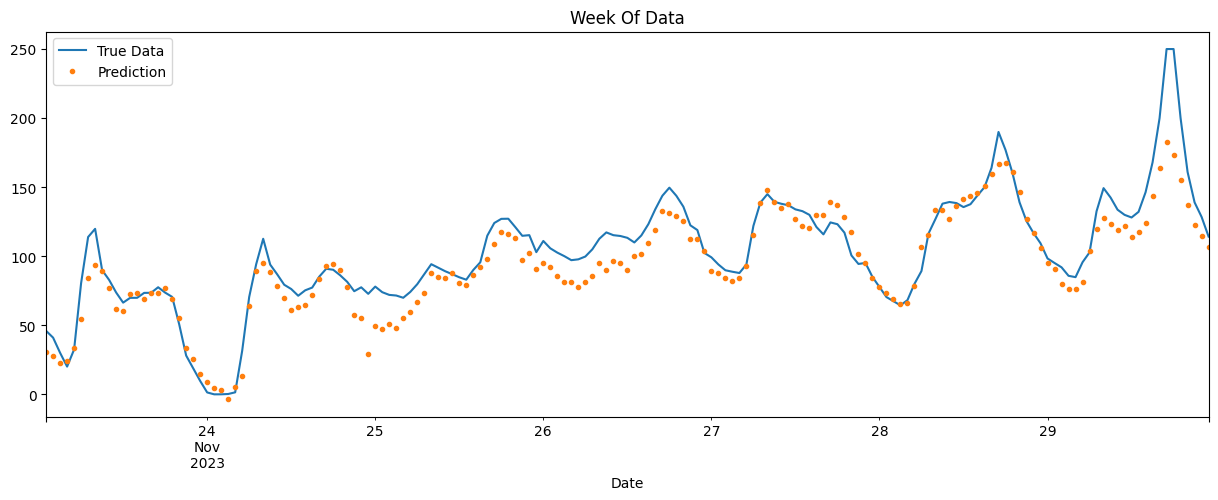

In [293]:
ax = df.loc[(df.index > '11-23-2023') & (df.index < '11-30-2023')]['price'] \
    .plot(figsize=(15, 5), title='Week Of Data')
df_temp.loc[(df_temp.index > '11-23-2023') & (df_temp.index < '11-30-2023')]['predictions'] \
    .plot(style='.')
plt.legend(['True Data','Prediction'])
plt.show()

In [285]:
selected_date = '2023-03-01'
hourly_data_for_date = data.loc[selected_date]

hourly_data_for_date = hourly_data_for_date.between_time('00:00:00', '23:59:59')

FEATURES = ["gas_price", "coal_price", "oil_price", "capacity_thermal_oil",
   "thermal_biomass_production", "solar_production", "wind_production", "y_lag_24", "y_lag_48", "y_lag_72", "hour", "weekday", "season"]

test_sample = hourly_data_for_date[FEATURES]

hourly_data_for_date["predictions"] = reg.predict(test_sample) + hourly_data_for_date["yhat"]

plt.figure(figsize=(12, 6))
plt.plot(hourly_data_for_date.index, hourly_data_for_date["price"], label='True Data', marker='o')
plt.plot(hourly_data_for_date.index, df_temp['predictions'], label='Prediction', marker='x')
plt.xlabel('Hour')
plt.ylabel('Energy Price')
plt.title(f'True Data vs. Prediction for {selected_date}')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


KeyError: '2023-03-01'